## NBA Player Mobility
Interested in seeing whether or not [player mobility](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiCj42Vo-D5AhXxFmIAHZMjAkEQFnoECBYQAQ&url=https%3A%2F%2Fwww.sportskeeda.com%2Fbasketball%2Fcolin-cowherd-questions-benefits-nba-player-mobility&usg=AOvVaw3QnFKJow_2y2SuE-6sLkzm)actually has increased the past few years as pundits have dubbed it the *NBA's Player Empowerment Era.*

In [27]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')


In [28]:
# Reading in Basketball Reference's Player Mobility Matrix
matrix_path = "https://www.basketball-reference.com/friv/continuity.html"
df = pd.read_html(matrix_path, index_col="Season")[0]


In [29]:
# Cleaning up matrix df
from numpy import int64


# df = df.loc[df.index != "Season"]

df = df.replace({"%": ""}, regex=True)
df = df.dropna(axis=0, how="any")
# Casting team columns to int type
for c in df.columns[1::]:
    df[c] = df[c].astype(int)




df#.head()

,ATL,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
Season,,,,,,,,,,,,,,,,,,,,,
2021-22,84,69,71,48,61,75,75,70,68,58,...,57,71,79,77,56,69,73,65,78,47
2020-21,48,73,79,69,54,79,70,14,72,20,...,42,52,58,66,60,67,90,68,90,52
2019-20,49,70,65,56,70,68,80,56,22,65,...,47,81,59,51,55,67,80,82,61,40
2018-19,45,96,79,64,59,61,98,74,81,70,...,73,85,57,39,82,58,63,67,92,49
2017-18,51,41,73,51,53,74,80,59,81,59,...,52,62,61,64,93,44,87,84,51,82
2016-17,68,79,80,46,83,50,71,75,67,65,...,53,56,50,68,85,47,69,84,70,77
2015-16,87,85,51,90,84,55,70,50,95,85,...,93,76,63,53,47,52,69,62,77,75
2014-15,88,50,61,64,39,38,62,57,80,48,...,66,52,29,81,80,70,98,82,61,72
2013-14,53,59,64,69,60,48,62,59,71,77,...,89,81,37,46,65,53,83,68,62,77


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/2145630209.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=season_avgs.index, rotation=90)


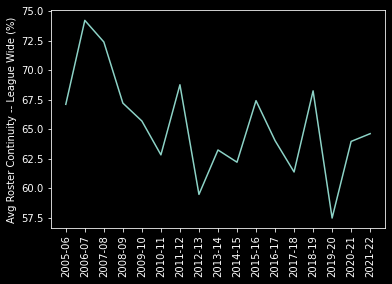

In [30]:
season_avgs = df.iloc[:, 1:31].mean(axis=1)[::-1]  # reversing the order for plotting (starting with oldest szn)

# Plotting avg roster continuity by season
f, ax = plt.subplots()
ax.plot(season_avgs.index, season_avgs)
ax.set_xticklabels(labels=season_avgs.index, rotation=90)
ax.set_ylabel("Avg Roster Continuity -- League Wide (%)")

f.savefig(os.path.join(".", "img", "nba_roster_continuity_avg.pdf"))

Siing a general downward trend in our plot over time. This means that NBA rosters have **more** turnover in the more recent years (in general)

/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/4230469060.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=turnover.index, rotation=90)


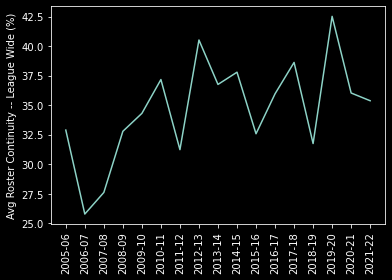

In [31]:
# Checking out roster turnover (1 - continuity rate)
turover = 100 - season_avgs

# Plotting avg roster continuity by season
f, ax = plt.subplots()
ax.plot(turnover.index, turnover)
ax.set_xticklabels(labels=turnover.index, rotation=90)
ax.set_ylabel("Avg Roster Continuity -- League Wide (%)")

f.savefig(os.path.join(".", "img", "nba_roster_continuity_avg.pdf"))

Using Basketball Reference's [Free Agent Tracker](https://www.basketball-reference.com/friv/free_agents.cgi?year=2016) to see if the number of players changing teams via free agency has increased. The tracker only dates back to 2016, so it's not a complete dataset

In [44]:
# Looping over each season

fa_dfs = []
for y in range(2021, 2015, -1):
    url = f"https://www.basketball-reference.com/friv/free_agents.cgi?year={y}"
    print(y)

    df = pd.read_html(url)[0]
    df = df.loc[df.Rk != "Rk"] ## Dropping repetitive subheader rows
    # print(df.head())

    fa_changes = df.loc[(df['NTm'] != df['OTm'])& (~df['NTm'].isna())]
    fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)
    fa_dfs.append(fa_changes)
    print(len(df), len(fa_changes))
    print(fa_changes.head())
    print('----------------------------')

fa = pd.concat(fa_dfs)

2021


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/290635295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)


365 156
    Rk          Player  Pos     Age Type  OTm                2020-21 Stats  \
2    3    Enes Freedom    C  30-098  UFA  POR  11.2 Pts, 11.0 Reb, 1.2 Ast   
3    4   DeMar DeRozan  G-F  33-019  UFA  SAS   21.6 Pts, 4.2 Reb, 6.9 Ast   
9   10    Kelly Olynyk  C-F  31-129  UFA  HOU   13.5 Pts, 7.0 Reb, 2.9 Ast   
14  15  Reggie Bullock  G-F  31-163  UFA  NYK   10.9 Pts, 3.4 Reb, 1.5 Ast   
18  19    Daniel Theis    C  30-144  UFA  CHI    9.6 Pts, 5.5 Reb, 1.7 Ast   

     WS  NTm                                              Terms Notes  Year  
2   7.5  BOS                 Signed 1-yr/$2.6M minimum contract   NaN  2021  
3   7.4  CHI  Signed 3-yr/$85M contract as part of a sign an...   NaN  2021  
9   5.1  DET                          Signed 3-yr/$37M contract   NaN  2021  
14  4.6  DAL                          Signed 3-yr/$30M contract   NaN  2021  
18  4.3  HOU  Signed 4-yr/$36M contract as part of sign and ...   NaN  2021  
----------------------------
2020


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/290635295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)


297 112
  Rk            Player  Pos     Age Type  OTm                2019-20 Stats  \
1  2  Hassan Whiteside    C  33-074  UFA  POR  15.5 Pts, 13.5 Reb, 1.2 Ast   
2  3  Montrezl Harrell  F-C  28-212  UFA  LAC   18.6 Pts, 7.1 Reb, 1.7 Ast   
3  4  Danilo Gallinari    F  34-018  UFA  OKC   18.7 Pts, 5.2 Reb, 1.9 Ast   
5  6    Gordon Hayward  F-G  32-156  UFA  BOS   17.5 Pts, 6.7 Reb, 4.1 Ast   
6  7     Dwight Howard    C  36-261  UFA  LAL    7.5 Pts, 7.3 Reb, 0.7 Ast   

    WS  NTm                                              Terms Notes  Year  
1  8.5  SAC                         Signed 1-yr $2.3M contract   NaN  2020  
2  7.0  LAL                          Signed 2-yr $19M contract   NaN  2020  
3  6.3  ATL  Signed 3-yr $61M contract with OKC as part of ...   NaN  2020  
5  5.7  CHO  Signed 4-yr/$120M contract with BOS as part of...   NaN  2020  
6  5.4  PHI                        Signed 1-yr $2.56M contract   NaN  2020  
----------------------------
2019


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/290635295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)


287 146
  Rk         Player  Pos     Age Type  OTm               2018-19 Stats    WS  \
0  1   Kevin Durant  F-G  33-331  UFA  GSW  26.0 Pts, 6.4 Reb, 5.9 Ast  11.5   
2  3  Kawhi Leonard    F  31-058  UFA  TOR  26.6 Pts, 7.3 Reb, 3.3 Ast   9.5   
3  4   Kyrie Irving    G  30-156  UFA  BOS  23.8 Pts, 5.0 Reb, 6.9 Ast   9.1   
4  5   Jimmy Butler  F-G  32-346  UFA  PHI  18.7 Pts, 5.3 Reb, 4.0 Ast   7.9   
5  6     Al Horford  C-F  36-084  UFA  BOS  13.6 Pts, 6.7 Reb, 4.2 Ast   7.5   

   NTm                                              Terms Notes  Year  
0  BRK  Signed 4-yr $164.25M contract with GSW as part...   NaN  2019  
2  LAC                      Signed 3-yr $103.13M contract   NaN  2019  
3  BRK                      Signed 4-yr $136.49M contract   NaN  2019  
4  MIA  Signed 4-yr $140.79M contract with PHI as part...   NaN  2019  
5  PHI                         Signed 4-yr $109M contract   NaN  2019  
----------------------------
2018


/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/290635295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)
/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/290635295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)


186 83
    Rk          Player  Pos     Age Type  OTm                2017-18 Stats  \
0    1    LeBron James  F-G  37-239  UFA  CLE   27.5 Pts, 8.6 Reb, 9.1 Ast   
5    6  DeAndre Jordan    C  34-036  UFA  LAC  12.0 Pts, 15.2 Reb, 1.5 Ast   
8    9   Dwight Howard    C  36-261  UFA  BRK  16.6 Pts, 12.5 Reb, 1.3 Ast   
9   10   Julius Randle  F-C  27-270  UFA  LAL   16.1 Pts, 8.0 Reb, 2.6 Ast   
11  12   Kyle Anderson  F-G  28-340  RFA  SAS    7.9 Pts, 5.4 Reb, 2.7 Ast   

      WS  NTm                                              Terms Notes  Year  
0   14.0  LAL    Signed 4-yr maximum salary contract ($153.31MM)   NaN  2018  
5    9.4  DAL                     Signed 1-yr $22.897MM contract   NaN  2018  
8    6.8  WAS  Signed 2-yr $10.941MM contract, second year pl...   NaN  2018  
9    6.6  NOP  Signed 2-yr $17.714MM contract, second year pl...   NaN  2018  
11   6.2  MEM                     Signed 4-yr $37.156MM contract   NaN  2018  
----------------------------
2017
171 73
    Rk   

/var/folders/60/nwdftyjj6cg3ysz_pf9stwtc0000gn/T/ipykernel_5468/290635295.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fa_changes['Year'] = np.full_like(fa_changes['Age'], fill_value=y)


In [45]:
fa

,Rk,Player,Pos,Age,Type,OTm,2020-21 Stats,WS,NTm,Terms,Notes,Year,2019-20 Stats,2018-19 Stats,2017-18 Stats,2016-17 Stats,2015-16 Stats
2,3,Enes Freedom,C,30-098,UFA,POR,"11.2 Pts, 11.0 Reb, 1.2 Ast",7.5,BOS,Signed 1-yr/$2.6M minimum contract,NaN,2021,NaN,NaN,NaN,NaN,NaN
3,4,DeMar DeRozan,G-F,33-019,UFA,SAS,"21.6 Pts, 4.2 Reb, 6.9 Ast",7.4,CHI,Signed 3-yr/$85M contract as part of a sign an...,NaN,2021,NaN,NaN,NaN,NaN,NaN
9,10,Kelly Olynyk,C-F,31-129,UFA,HOU,"13.5 Pts, 7.0 Reb, 2.9 Ast",5.1,DET,Signed 3-yr/$37M contract,NaN,2021,NaN,NaN,NaN,NaN,NaN
14,15,Reggie Bullock,G-F,31-163,UFA,NYK,"10.9 Pts, 3.4 Reb, 1.5 Ast",4.6,DAL,Signed 3-yr/$30M contract,NaN,2021,NaN,NaN,NaN,NaN,NaN
18,19,Daniel Theis,C,30-144,UFA,CHI,"9.6 Pts, 5.5 Reb, 1.7 Ast",4.3,HOU,Signed 4-yr/$36M contract as part of sign and ...,NaN,2021,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,162,Phil Pressey,G,31-190,RFA,PHO,NaN,-0.1,GSW,Reportedly agreed to training camp deal with W...,NaN,2016,NaN,NaN,NaN,NaN,"3.3 Pts, 1.3 Reb, 3.3 Ast"
171,164,Kevin Séraphin,F,32-262,UFA,NYK,NaN,-0.2,IND,Signed 2-yr/$3.6M deal with Pacers,NaN,2016,NaN,NaN,NaN,NaN,"3.9 Pts, 2.6 Reb, 1.0 Ast"
172,165,Greivis Vásquez,G,35-222,UFA,MIL,NaN,-0.3,BRK,Signed 1-yr deal with Nets,NaN,2016,NaN,NaN,NaN,NaN,"5.7 Pts, 2.0 Reb, 4.0 Ast"
173,166,Justin Hamilton,C,32-147,UFA,NaN,NaN,NaN,BRK,Signed 2-yr/$6M deal with Nets,NaN,2016,NaN,NaN,NaN,NaN,Did not play


In [46]:
# Grouping by year and FA type (Unrestricted vs Restricted)
fa_types = fa.groupby(["Year", "Type"])['Player'].count()

fa_types

Year  Type
2016  RFA      14
      UFA      88
2017  RFA       1
      UFA      72
2018  RFA       2
      UFA      81
2019  RFA       7
      UFA     139
2020  RFA       9
      UFA     103
2021  RFA      22
      UFA     134
Name: Player, dtype: int64

<AxesSubplot:xlabel='Year,Type'>

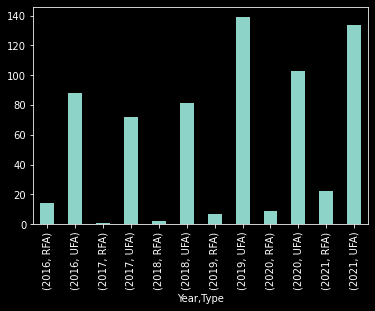

In [47]:
fa_types.plot(kind='bar')